In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [16]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [17]:
xls = pd.ExcelFile('Ms_data_2004.xls')

In [18]:
data = pd.read_excel(xls, 'All_data_verified')

In [19]:
df_base = data.set_index('Ref')

In [31]:
df_base.head()

,C,Mn,Si,Cr,Ni,Mo,V,Co,Al,W,Cu,Nb,Ti,B,N,Ms(k)
Ref,,,,,,,,,,,,,,,,
BT-9,0.25,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,685.0
BT-10,0.30,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,666.0
BT-11,0.38,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,631.0
BT-12,0.40,0.70,0.20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,629.0
BT-13,0.44,0.81,0.28,0.14,0.15,0.04,0.0,0.0,0.0,0.0,0.12,0.0,0.0,0.0,0.0,591.0


In [21]:
[x for x in df_base.columns]

['C',
 'Mn',
 'Si',
 'Cr',
 'Ni',
 'Mo',
 'V',
 'Co',
 'Al',
 'W',
 'Cu',
 'Nb',
 'Ti',
 'B',
 'N',
 'Ms(k)']

In [22]:
y = df_base['Ms(k)']

features = ['C',
 'Mn',
 'Si',
 'Cr',
 'Ni',
 'Mo',
 'V',
 'Co',
 'Al',
 'W',
 'Cu',
 'Nb',
 'Ti',
 'B',
 'N']


X = df_base[features]

In [23]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [24]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y,rf_val_predictions)

print("Validation MAE for Random Forest Model:",rf_val_mae)

Validation MAE for Random Forest Model: 16.65502447283847


C:\Users\haris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = train_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
C,0.466444
Ni,0.243484
Mn,0.115621
N,0.091091
Cr,0.036786
Si,0.012262
B,0.008009
Mo,0.006880
Al,0.006639
Ti,0.003464


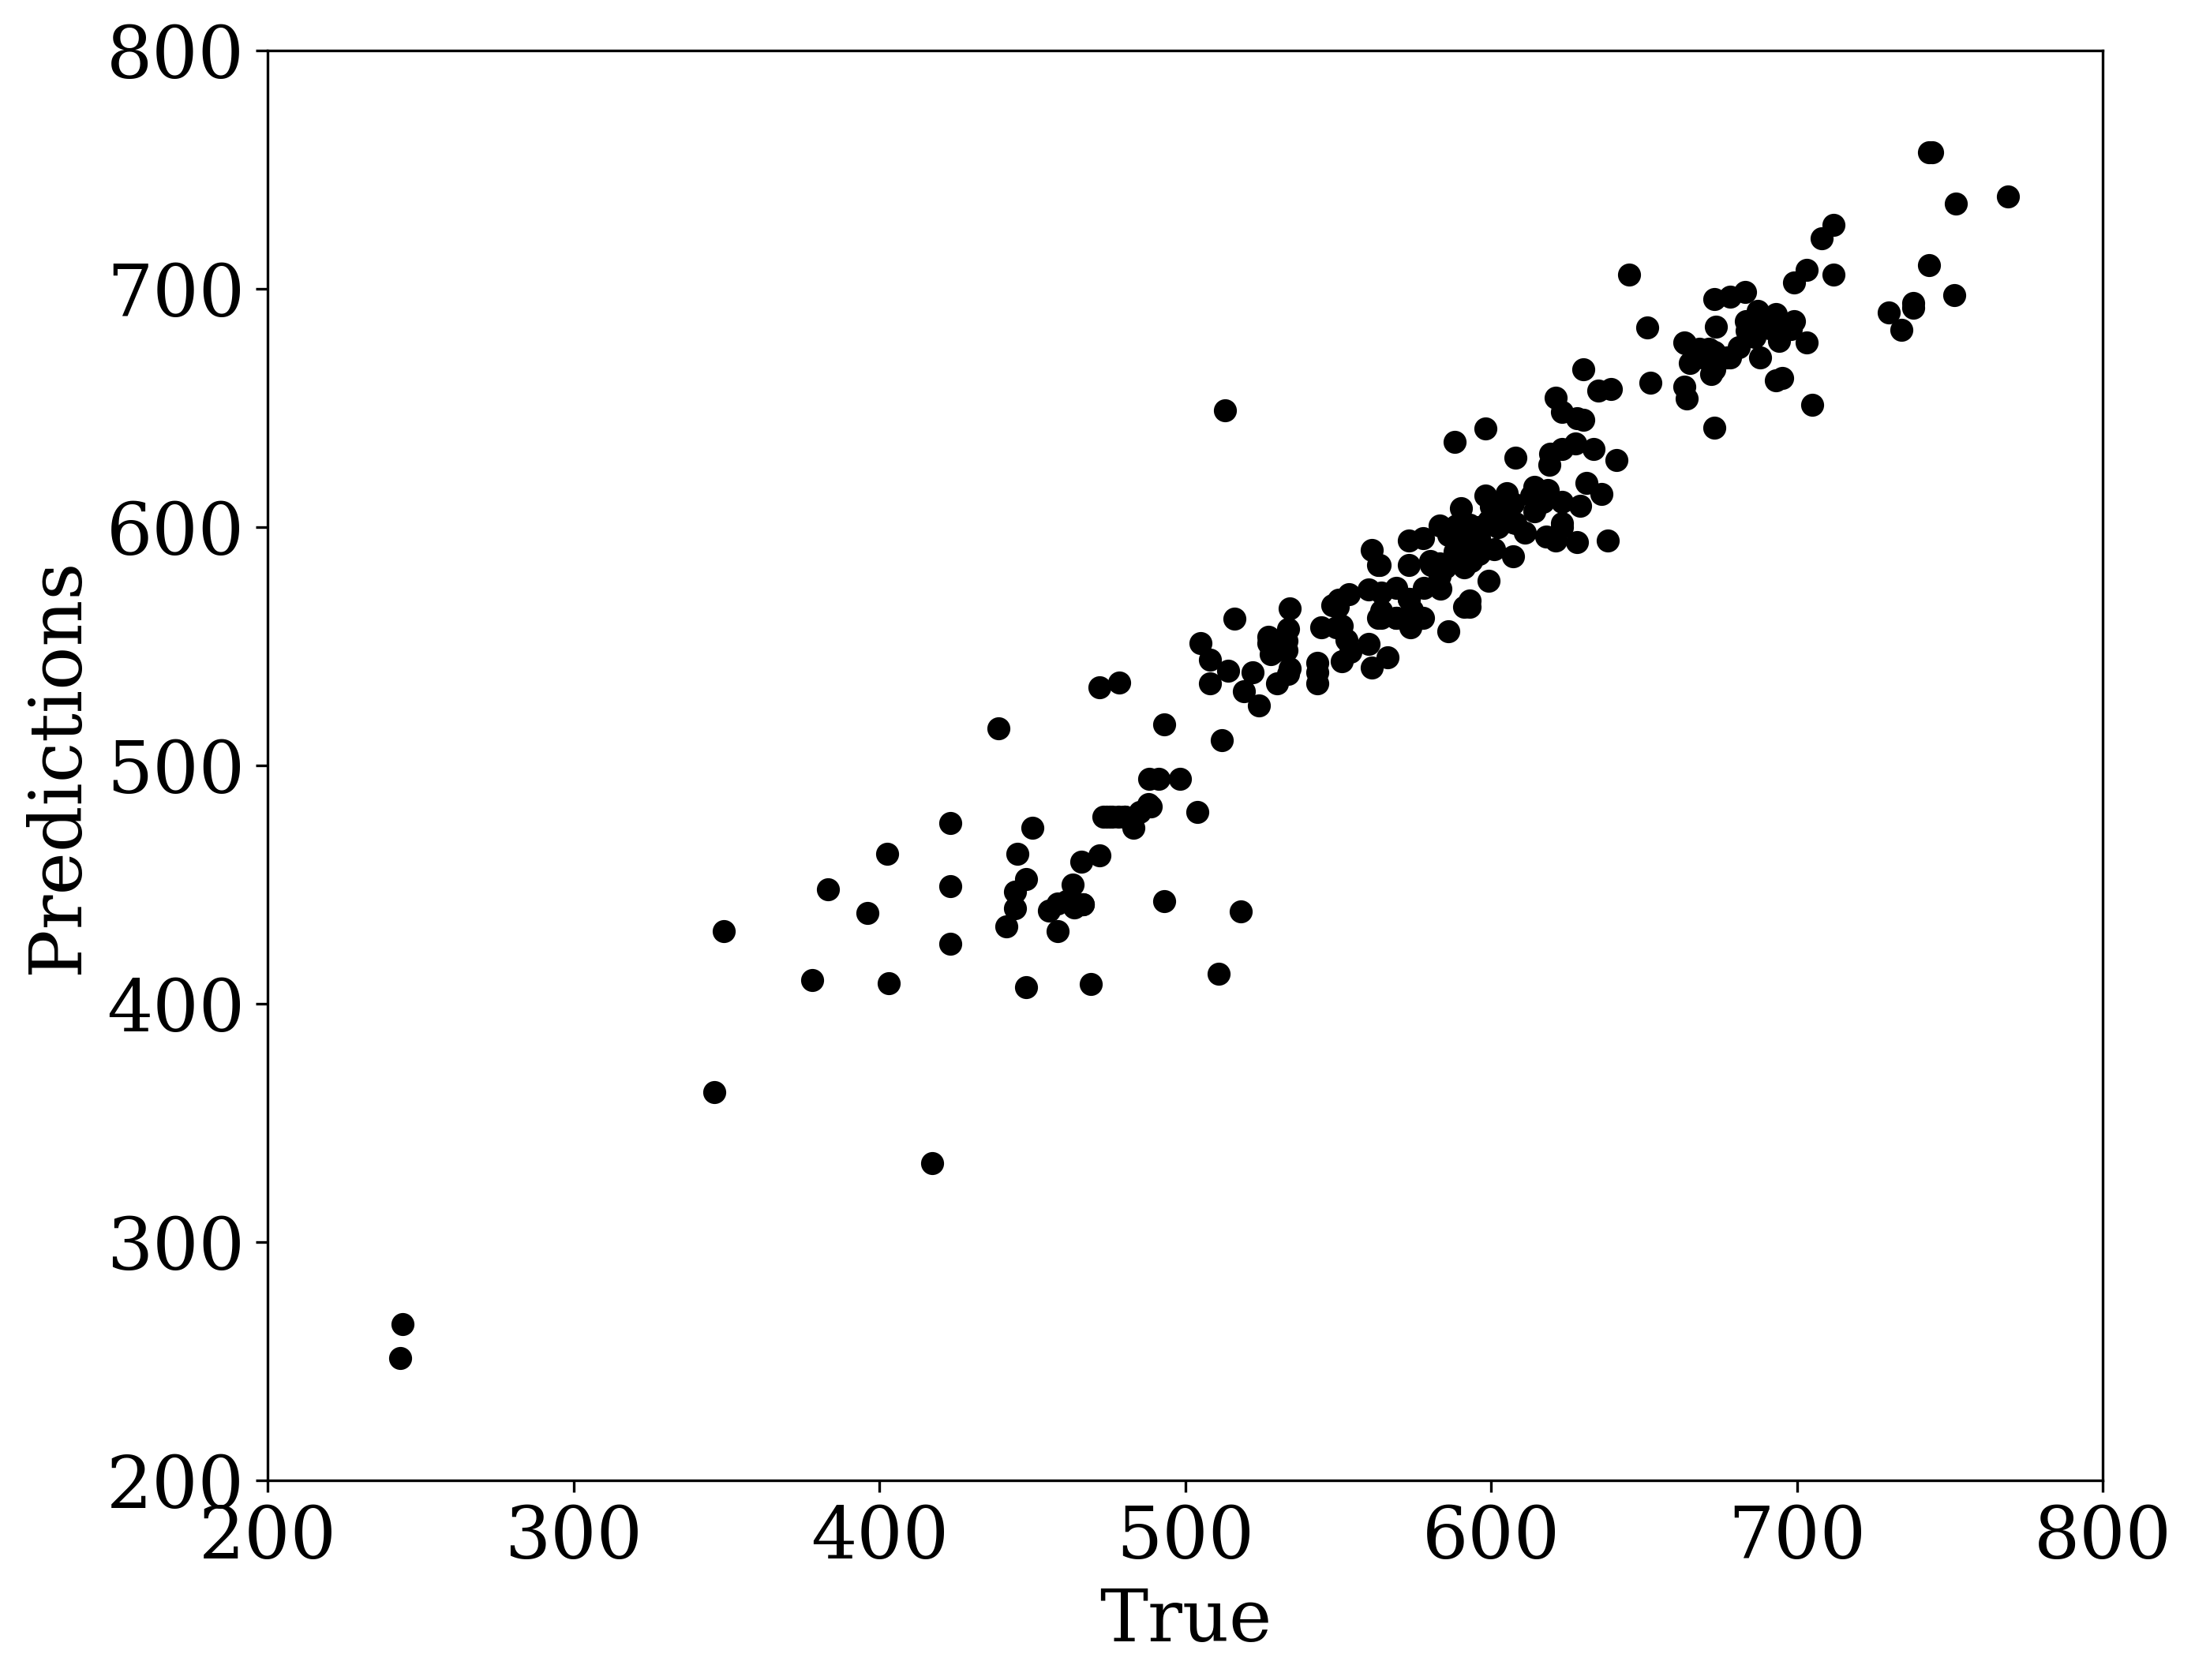

In [29]:
xi = val_y
yi = rf_val_predictions

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.dpi"] = 300
plt.rc('font', family='serif', size=22)

plt.xlim(200,800)
plt.ylim(200,800)

plt.plot(xi, yi, 'o', color='black')

plt.xlabel('True', fontsize=22)
plt.ylabel('Predictions', fontsize=22)

plt.draw()
plt.show()

In [27]:
rmse = rmsle(val_y,rf_val_predictions)

print("Validation ROOT MEAN SQUARED ERROR for Random Forest Model:",rmse)

Validation ROOT MEAN SQUARED ERROR for Random Forest Model: 24.99494206515056


In [28]:
r_2 = rf_model.score(val_X,val_y)

r_2

0.9227451587030406

In [36]:
xaco = {'C':[0.49],
 'Mn':[0.57],
 'Si':[0],
 'Cr':[0],
 'Ni':[0],
 'Mo':[0],
 'V':[0],
 'Co':[0],
 'Al':[0],
 'W':[0],
 'Cu':[0.97],
 'Nb':[0],
 'Ti':[0],
 'B':[0],
 'N':[0]}

In [37]:
df_xaco = pd.DataFrame(data=xaco)

In [39]:
xi = df_xaco

In [43]:
rf_model_completo = RandomForestRegressor(random_state=1)

rf_model_completo.fit(X,y)

C:\Users\haris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [46]:
mstart = rf_model_completo.predict(xi)

In [47]:
mstart

array([590.4])